##Anjali Obervations  - 

#1 .Sentiments expressed in Tweets sent out by the BBS and CBS are stingly positive for a given date range .
#2 .Sentiments expressed in Tweets sent out by the Fox and NYT are negative range .
#3 .This charts and sentiment alaysis and chart may change for another date as all the tweets are live and very dynamic in nature and can not be predicted . 

In [16]:
# Dependencies
import tweepy
import time
import json
import random
import requests as req
import datetime
import pandas as pd
from config import consumer_key, consumer_secret, access_token, access_token_secret, weather_api_key

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

import  matplotlib.pyplot as plt
import datetime 
import numpy as np

In [2]:
# Set Twitter API Keys
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())



In [4]:
# Target Search Term
#BBC, CBS, CNN, Fox, and New York times
target_terms =  ["@BBC", "@CBS", "@CNN", "@Foxnews", "@NYTimes"]

# List to hold results
sentiments = []
counter = 1
loopcount =1
# Loop through all target users
for target in target_terms:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Run search around each tweet
    public_tweets = api.user_timeline(target,count=100, result_type="recent")

    # Loop through all tweets
    counter =1
    for tweet in public_tweets:
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        
        sentiments.append({"News Channel": target,
                           "Tweet Text" :tweet["text"],
                           "Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter}) 
        counter +=1
    print("==========Done iteration : {}============".format(loopcount))
    loopcount += 1 

print("====================Done all iterations==============")

==========Done iteration : 1============
==========Done iteration : 2============
==========Done iteration : 3============
==========Done iteration : 4============
==========Done iteration : 5============
====================Done all iterations==============


In [48]:
news_df = pd.DataFrame(sentiments)
news_df.to_csv("news.csv")




In [38]:
news_df.head(5)

,Compound,Date,Negative,Neutral,News Channel,Positive,Tweet Text,Tweets Ago
0,0.4215,Sat Sep 29 20:32:03 +0000 2018,0.743,0.000,@BBC,0.257,Chile has launched a huge hiking route through...,1
1,0.4215,Sat Sep 29 17:02:12 +0000 2018,0.865,0.000,@BBC,0.135,🐣😍 Conservationists have been monitoring the p...,2
2,-0.7003,Sat Sep 29 16:01:07 +0000 2018,0.707,0.293,@BBC,0.000,'My children bought back the car I sold to pay...,3
3,0.5499,Sat Sep 29 15:54:38 +0000 2018,0.871,0.000,@BBC,0.129,RT @BBCEngland: Benny the beluga whale is spen...,4
4,0.7088,Sat Sep 29 15:02:04 +0000 2018,0.671,0.000,@BBC,0.329,Always start by playing paper! 👊✋✌️\n\nThis is...,5


In [49]:
#["@BBC", "@CBS", "@CNN", "@Foxnews", "@NYTimes"]
#
bcc_df = news_df[news_df["News Channel"] == "@BBC"]
cbs_df = news_df[news_df["News Channel"] == "@CBS"]
cnn_df = news_df[news_df["News Channel"] == "@CNN"]
fox_df = news_df[news_df["News Channel"] == "@Foxnews"]
ny_df = news_df[news_df["News Channel"] == "@NYTimes"]


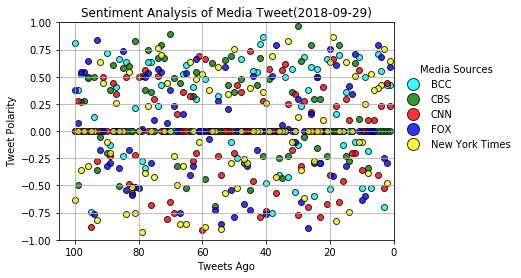

In [50]:
# Create plot
x_vals = news_df["Tweets Ago"]
y_vals = news_df["Compound"]
s_value = news_df["News Channel"]


plt.scatter(bcc_df["Tweets Ago"],bcc_df["Compound"],c="aqua",alpha=0.8,edgecolor = "black", marker="o", label='BCC')
plt.scatter(cbs_df["Tweets Ago"],cbs_df["Compound"],c="green",alpha=0.8,edgecolor = "black", marker="o", label='CBS')
plt.scatter(cnn_df["Tweets Ago"],cnn_df["Compound"],c="red",alpha=0.8,edgecolor = "black", marker="o", label='CNN')
plt.scatter(fox_df["Tweets Ago"],fox_df["Compound"],c="blue",alpha=0.8,edgecolor = "black", marker="o", label='FOX')
plt.scatter(ny_df["Tweets Ago"],ny_df["Compound"],c="yellow",alpha=0.8,edgecolor = "black", marker="o", label='New York Times')




# # Incorporate the other graph properties
now = datetime.datetime.now()
now = now.strftime("%Y-%m-%d")
plt.title(f"Sentiment Analysis of Media Tweet({now})")
plt.xlim([105,0]) 
plt.ylim([-1,1]) #Bonus
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid()
plt.legend(title = "Media Sources", frameon = False, edgecolor = 'black', bbox_to_anchor=(1, 0.85),markerscale=2.0)
plt.savefig("./polarityImage.png")
plt.show()


In [41]:
news_df.head(20)
news_compound_df = news_df[["News Channel","Compound"]]
news_compound_df.head(20)
news_by_channel_df = news_compound_df.groupby("News Channel").mean()
news_by_channel_df 



,Compound
News Channel,
@BBC,0.132080
@CBS,0.141713
@CNN,-0.024652
@Foxnews,0.004491
@NYTimes,-0.006996


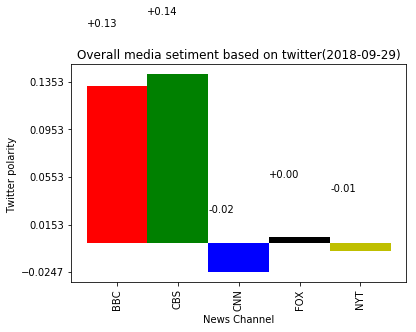

In [47]:
news_by_channel_df.plot(kind="bar",color='rgbkymc',legend =False,width=1.0)
y_values = news_by_channel_df["Compound"]
plt.title(f"Overall media setiment based on twitter({now})")
plt.ylabel("Twitter polarity ")
inds = np.arange(5)
plt.xticks(inds, ('BBC', 'CBS', 'CNN', 'FOX', 'NYT'))
plt.yticks(np.arange(y_values.min(),y_values.max(), 0.04))
for i, v in enumerate(y_values ):
    plt.text(i-.5, v+.05, "{:+.2f}".format(v), color='black')
plt.savefig("./ChannelSetimentImage.png")    
plt.show()
